# DATA101-001 Final Assessment - Hawk EDA
You will be performing exploratory data analysis (EDA) on a dataset that has measurements for different hawk species collected over several years. 
- Please provide brief comments in the cells as noted.

## Dataset
Data is collected on random samples of three different species of hawks: Red-tailed, Sharp-shinned, and Cooper's hawks.
- Month	code 8=September to 12=December
- Day	Date in the month
- Year	Year: 1992-2003
- CaptureTime	Time of capture (HH:MM)
- ReleaseTime	Time of release (HH:MM)
- BandNumber	ID band code
- Species	CH=Cooper's Hawk, RT=Red-tailed, SS=Sharp-Shinned
- Age	A=Adult or I=Imature
- Sex	F=Female or M=Male
- Wing	Length (in mm) of primary wing feather from tip to wrist it attaches to
- Weight	Body weight (in gm)
- Culmen	Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird
- Hallux	Length (in mm) of the killing talon
- Tail	Measurement (in mm) related to the length of the tail (invented at the MacBride Raptor Center)
- StandardTail	Standared measurement of tail length (in mm)
- Tarsus	Length of the basic foot bone (in mm)
- WingPitFat	Amount of fat in the wing pit
- KeelFat	Amount of fat on the breastbone (measured by feel
- Crop	Amount of material in the crop, coded from 1=full to 0=empty

In [119]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [120]:
#Reading and displaying the data
df=pd.read_csv("datas.csv")
df

,rownames,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,4,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,904,11,18,2003,14:44,,1177-04777,RT,I,NaN,380.0,1525.0,26.0,27.6,224,227.0,NaN,NaN,3.0,0.0
904,905,11,19,2003,10:18,,803-05985,SS,I,F,190.0,175.0,12.7,15.4,150,153.0,NaN,NaN,4.0,0.0
905,906,11,19,2003,12:02,,1807-53145,RT,I,NaN,360.0,790.0,21.9,27.6,211,215.0,NaN,NaN,2.0,0.0
906,907,11,20,2003,9:56,,1177-04778,RT,I,NaN,369.0,860.0,25.2,28.0,207,210.0,NaN,NaN,2.0,0.0


In [121]:
#Testing for missing data
df.isnull().sum()

rownames          0
Month             0
Day               0
Year              0
CaptureTime       0
ReleaseTime       1
BandNumber        0
Species           0
Age               0
Sex             576
Wing              1
Weight           10
Culmen            7
Hallux            6
Tail              0
StandardTail    337
Tarsus          833
WingPitFat      831
KeelFat         341
Crop            343
dtype: int64

In [122]:
#Displaying number of rows and columns
df.shape

(908, 20)

In [123]:
#Treating missing data
#Droping 'Sex', 'Tarsus', 'WingPitFat', 'KeelFat', 'Crop', 'StandardTail' as they 
#have several NaN's from the original dataframe.
df.drop(columns=['Sex', 'Tarsus', 'WingPitFat', 'KeelFat', 'Crop', 'StandardTail'], inplace=True)

In [124]:
#Displaying the dataframe after the columns mentioned in the previous cell are removed
df

,rownames,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Wing,Weight,Culmen,Hallux,Tail
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,385.0,920.0,25.7,30.1,219
1,2,9,22,1992,10:30,,877-76318,RT,I,376.0,930.0,NaN,NaN,221
2,3,9,23,1992,12:45,,877-76319,RT,I,381.0,990.0,26.7,31.3,235
3,4,9,23,1992,10:50,,745-49508,CH,I,265.0,470.0,18.7,23.5,220
4,5,9,27,1992,11:15,,1253-98801,SS,I,205.0,170.0,12.5,14.3,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,904,11,18,2003,14:44,,1177-04777,RT,I,380.0,1525.0,26.0,27.6,224
904,905,11,19,2003,10:18,,803-05985,SS,I,190.0,175.0,12.7,15.4,150
905,906,11,19,2003,12:02,,1807-53145,RT,I,360.0,790.0,21.9,27.6,211
906,907,11,20,2003,9:56,,1177-04778,RT,I,369.0,860.0,25.2,28.0,207


In [125]:
#Testing if missing data still exist
df.isnull().sum()

rownames        0
Month           0
Day             0
Year            0
CaptureTime     0
ReleaseTime     1
BandNumber      0
Species         0
Age             0
Wing            1
Weight         10
Culmen          7
Hallux          6
Tail            0
dtype: int64

In [126]:
#Droping 'rownames' column too as it isn't useful for our EDA and displaying the dataframe after removing it
df.drop(columns=['rownames'], inplace=True)

In [127]:
#Dropping rows with missing data from the dataframe
#Resetting the index
df.dropna(inplace=True)
df.reset_index(drop=True)

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Wing,Weight,Culmen,Hallux,Tail
0,9,23,1992,12:45,,877-76319,RT,I,381.0,990.0,26.7,31.3,235
1,9,23,1992,10:50,,745-49508,CH,I,265.0,470.0,18.7,23.5,220
2,9,27,1992,11:15,,1253-98801,SS,I,205.0,170.0,12.5,14.3,157
3,9,28,1992,11:25,,1207-55910,RT,I,412.0,1090.0,28.5,32.2,230
4,9,28,1992,13:30,,877-76320,RT,I,370.0,960.0,25.3,30.1,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,11,18,2003,14:44,,1177-04777,RT,I,380.0,1525.0,26.0,27.6,224
886,11,19,2003,10:18,,803-05985,SS,I,190.0,175.0,12.7,15.4,150
887,11,19,2003,12:02,,1807-53145,RT,I,360.0,790.0,21.9,27.6,211
888,11,20,2003,9:56,,1177-04778,RT,I,369.0,860.0,25.2,28.0,207


In [128]:
#Testing the dataframe for missing data one more time
df.isnull().sum()

Month          0
Day            0
Year           0
CaptureTime    0
ReleaseTime    0
BandNumber     0
Species        0
Age            0
Wing           0
Weight         0
Culmen         0
Hallux         0
Tail           0
dtype: int64

In [129]:
#Displaying the final version of the dataframe with the number of columns, column labels, column data types, memory usage,etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 2 to 907
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        890 non-null    int64  
 1   Day          890 non-null    int64  
 2   Year         890 non-null    int64  
 3   CaptureTime  890 non-null    object 
 4   ReleaseTime  890 non-null    object 
 5   BandNumber   890 non-null    object 
 6   Species      890 non-null    object 
 7   Age          890 non-null    object 
 8   Wing         890 non-null    float64
 9   Weight       890 non-null    float64
 10  Culmen       890 non-null    float64
 11  Hallux       890 non-null    float64
 12  Tail         890 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 97.3+ KB


In [130]:
#Displaying counts of unique values for each of the species
print('Unique values for each species:', df['Species'].nunique())

Unique values for each species: 3


In [131]:
#Displaying counts of unique values for age 
print('Unique values for age:', df['Age'].nunique())

Unique values for age: 2


*Are the two columns you examined in the previous cells balanced?* <br>
**Answer:** Yes they are not balanced as the unique values in each column are relatively even, with only a difference of 1


<Axes: xlabel='Age', ylabel='Tail'>

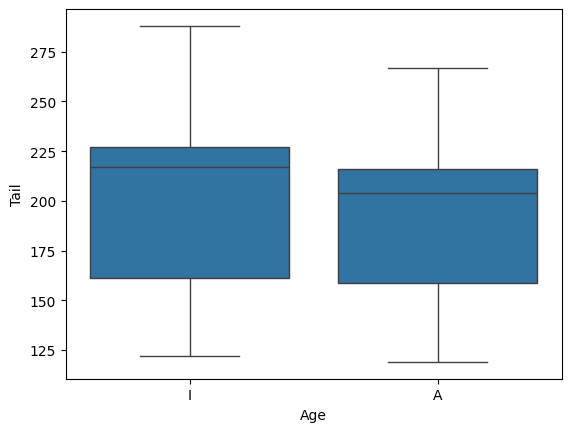

In [132]:
#Creating a boxplot with Age and Tail
sns.boxplot(x='Age', y='Tail', data=df)

*From the boxplot: are there any outliers; what are the min,max,median values for tail dimension?* <br>
**Answer:** <br>
There aren't any outliers for both ages. <br>
Age I has a max close to 300, a min of about 125, and a median that is about 220 <br>
Age A has a max close to 275, a min of less than 125, and median that is a little above 200

<Axes: xlabel='Tail', ylabel='Wing'>

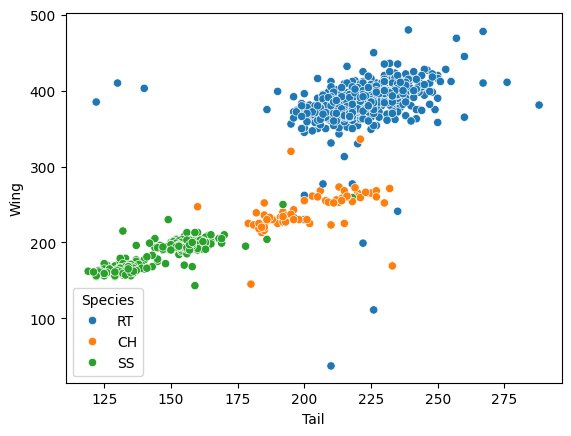

In [133]:
#Creating a scatterplot with 'Tail' and 'Wing' and 'Species' 
sns.scatterplot(x='Tail', y='Wing', hue='Species', data=df)

*Based on the scatterplot, if Tail=150 and Wing=200, what would be the Species of the bird?* <br>
**Answer:** The species of the bird will be Sharp Shinned (SS) <br> <br>
*In order for a hawk to be in RT species, give a possible set of dimensions for Tail and Wing* <br>
**Answer:** Tail=225 and Wing=400

<Axes: xlabel='Weight', ylabel='Culmen'>

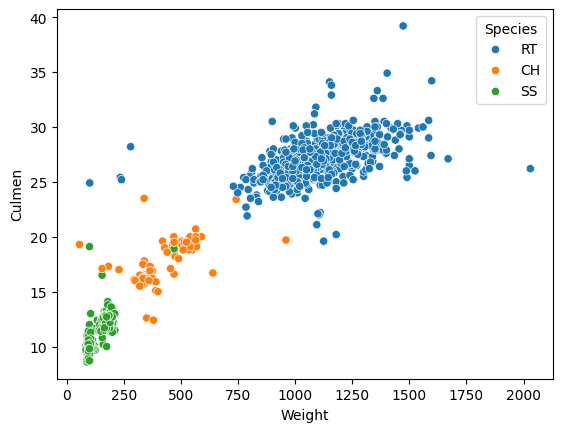

In [134]:
#Scatterplot for Weight, Culmen and Species
sns.scatterplot(x='Weight', y='Culmen', hue='Species', data=df)

*Based on the scatterplot, if a bird has a weight of 1250 what would be its predicted species?* <br>
**Answer:** It's predicted species would be the Red-tailed (RT) <br> <br>
*What if it has a weight of 500 and culmen of 20?* <br>
**Answer:** The bird would most likely be Cooper's Hawk(CH)

<Axes: xlabel='Weight', ylabel='Density'>

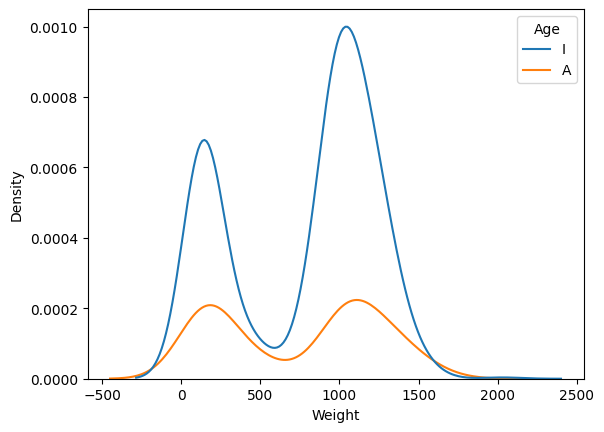

In [135]:
#kdeplot for weight and Age
sns.kdeplot(hue='Age', x='Weight', data=df)

<Axes: >

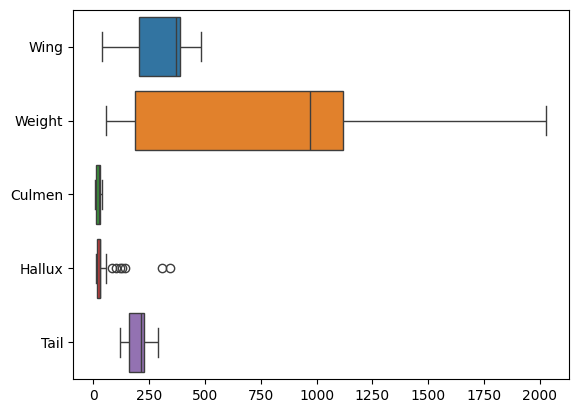

In [136]:
#Creating a boxplot using numerical variables/columns: Wing, Weight, Culmen, Hallux, Tail
sns.boxplot(data=df[['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']], orient='h')

*Comment on the boxplot: outliers, min, max, median values for each varibale/column* <br>
**Answer:** <br>
Hallux is the only column that has outliers. <br>
Wing has a max of 500, a min that is a little above 0, and a median of about 310 <br>
Weight has a max of 2000, a min that is a little above 0, and a median of 1000 <br>
Due to the scale of the other numeric columns, it's hard to distinguish the max, min, and median of Culmen. However, the boxplot ranges from 0-100 <br>
Similar to Culmen, it's hard to distinguish the values of Hallux. But the column does have outliers greater than a third of its data with some ranging from 100-375 <br>
Tail has a max of about 275, a min of 125, and a median that's a little bit below 250

In [137]:
#Grouping the dataframe acording to species and calculating the average weight for each.
df.groupby('Species')['Weight'].mean()

Species
CH     419.623188
RT    1095.150177
SS     148.156863
Name: Weight, dtype: float64

In [138]:
#Creating a new variable by grouping the data according to the year, and calculating the total number of hawks observed
hawks_year = df.groupby('Year')['Species'].count()
print(hawks_year)

Year
1992     35
1993     37
1994    128
1995     72
1996     18
1997     78
1998     33
1999     83
2000    115
2001     84
2002     99
2003    108
Name: Species, dtype: int64


*Which year has the highest number of hawks as evidenced by the ouput generated in the previous cell?* <br>
**Answer:** The year with the highest number of hawks is 1994 with 128 observed

In [139]:
#Obtaining the correlation on numeric columns and comment on the values
#The columns with the highest correlation to Weight are Wing(0.935) and Culmen(0.953)
#The column with the lowest correlation to Weight is Hallux(0.430)
#Tail has a good correlation with Weight (0.875) but it's not as high as Wing and Culmen
df[['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']].corr()[['Weight']]

,Weight
Wing,0.934854
Weight,1.000000
Culmen,0.953366
Hallux,0.429813
Tail,0.874598


*If we were to use multiple linear regression to predict the weight, what are the top two variables highly correlated with it?* <br>
**Answer:** The top two variables highly correlated wit it are Wing and Culmen

In [140]:
#Filtering out Cooper's Hawk data
cooper = df[df['Species'] == 'CH'].reset_index()

features = ['Wing', 'Culmen']
x = cooper[features]

#Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, cooper[['Weight']], random_state=42)

In [141]:
x.head()

,Wing,Culmen
0,265.0,18.7
1,233.0,16.0
2,252.0,16.0
3,240.0,16.1
4,271.0,18.2


In [142]:
#Creating model, fitting data, and scoring testing data
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_model.score(x_test, y_test)

0.3814418336694878

In [143]:
#Use the linear model to predict the weight
y_predicted = linear_model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns=['Weight_Predicted'])
predicted.head()

,Weight_Predicted
0,651.674397
1,456.580976
2,509.775334
3,436.281643
4,370.673169


In [144]:
#Join predicted with the rest of the data
df_final = cooper.join(predicted)
df_final.head()

,index,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Wing,Weight,Culmen,Hallux,Tail,Weight_Predicted
0,3,9,23,1992,10:50,,745-49508,CH,I,265.0,470.0,18.7,23.50,220,651.674397
1,41,9,20,1993,13:45,,120407-804,CH,I,233.0,324.0,16.0,19.30,191,456.580976
2,55,10,1,1993,10:20,,745-49512,CH,I,252.0,340.0,16.0,20.80,230,509.775334
3,56,10,1,1993,10:45,,745-49513,CH,A,240.0,340.0,16.1,19.30,192,436.281643
4,66,10,12,1993,13:15,,745-49515,CH,I,271.0,475.0,18.2,24.75,232,370.673169


In [145]:
#Calculating the residuals and inserting new column
df_final['Residuals'] = df_final['Weight'] - df_final['Weight_Predicted']
df_final.head()

,index,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Wing,Weight,Culmen,Hallux,Tail,Weight_Predicted,Residuals
0,3,9,23,1992,10:50,,745-49508,CH,I,265.0,470.0,18.7,23.50,220,651.674397,-181.674397
1,41,9,20,1993,13:45,,120407-804,CH,I,233.0,324.0,16.0,19.30,191,456.580976,-132.580976
2,55,10,1,1993,10:20,,745-49512,CH,I,252.0,340.0,16.0,20.80,230,509.775334,-169.775334
3,56,10,1,1993,10:45,,745-49513,CH,A,240.0,340.0,16.1,19.30,192,436.281643,-96.281643
4,66,10,12,1993,13:15,,745-49515,CH,I,271.0,475.0,18.2,24.75,232,370.673169,104.326831


In [146]:
df_show_columns = ['Weight', 'Weight_Predicted', 'Residuals']
df_show = df_final[df_show_columns]
df_show.head()

,Weight,Weight_Predicted,Residuals
0,470.0,651.674397,-181.674397
1,324.0,456.580976,-132.580976
2,340.0,509.775334,-169.775334
3,340.0,436.281643,-96.281643
4,475.0,370.673169,104.326831


<Axes: xlabel='Residuals', ylabel='Density'>

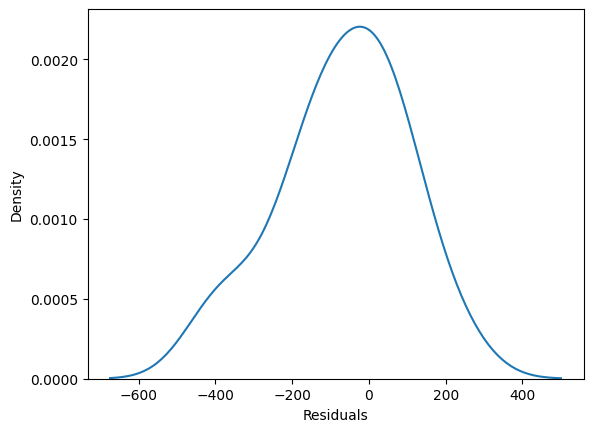

In [147]:
#Plotting the residuals
sns.kdeplot(data=df_final, x='Residuals')